In [1]:
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.fasttext import load_facebook_vectors
from gensim.models import FastText

from IPython.display import Image
from IPython.display import display
import seaborn as sns
from itertools import combinations
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/slavkoz/anaconda3/envs/offensive-language-organization/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# PARAMETERS
listOfWords = ['toxic','offensive',"abusive","cyberbullying","vulgar","racist","homophobic","profane","slur","harrasment","obscene","threat","discredit","hateful","insult","hostile",'taboo']

In [3]:
listOfWordsCombinations = list(combinations(listOfWords,2))

def similartyHeatmapPairs(pairs,model):
    '''return ((word1,word2),simScore)'''
    return [(x,model.wv.similarity(*x)) for x in pairs]

In [4]:
def plot_heatmap_postprocess(df_hm, xlabels, ylabels):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(18, 18))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    # Draw the heatmap with the mask and correct aspect ratio
    res = sns.heatmap(df_hm, 
            mask=mask, 
            cmap=cmap, 
            center=0.5,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.5, fmt='.2f',
            annot=True, annot_kws={"fontsize":17}, 
            cbar_kws={"shrink": .7}, 
            vmax=1)
    
    for t in res.texts: 
        t.set_text(t.get_text().replace("-", "")[1:])
        
    ax.set_xticklabels(ax.get_xticklabels(),fontsize =17)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize =17)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    cbar = ax.collections[0].colorbar    
    cbar.ax.tick_params(labelsize=15)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax    

In [5]:
def plot_heatmap(listOfWordsCombinations, model_gn):
    similartyHeatmapData = similartyHeatmapPairs(listOfWordsCombinations, model_gn)

    listOfWordsCombinationsDict = {x:k for k,x in enumerate(listOfWords)}

    p,s = zip(*similartyHeatmapData)

    df = pd.DataFrame({'pair': p, 'similarity': s})
    df_tmp =[(listOfWordsCombinationsDict.get(k[0]), \ 
              listOfWordsCombinationsDict.get(k[1]),v) for k ,v in similartyHeatmapData]
    df_hm = pd.DataFrame({'ind': range(17), \ 
                          'cols': range(17), 'vals': pd.Series(np.zeros(17))})

    # convert to a matrix
    df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)
    # to get lower diagnol, swap the rows and cols.
    for row, col, similarity in df_tmp:
        df_hm.iloc[col, row] = similarity


    ids = list(listOfWordsCombinationsDict.keys())
    y_ids = ids[1:]
    x_ids = ids[:len(ids)-1]

    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    masked_corr = df_hm.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]

    return plot_heatmap_postprocess(masked_corr, x_ids, y_ids)

<AxesSubplot:>

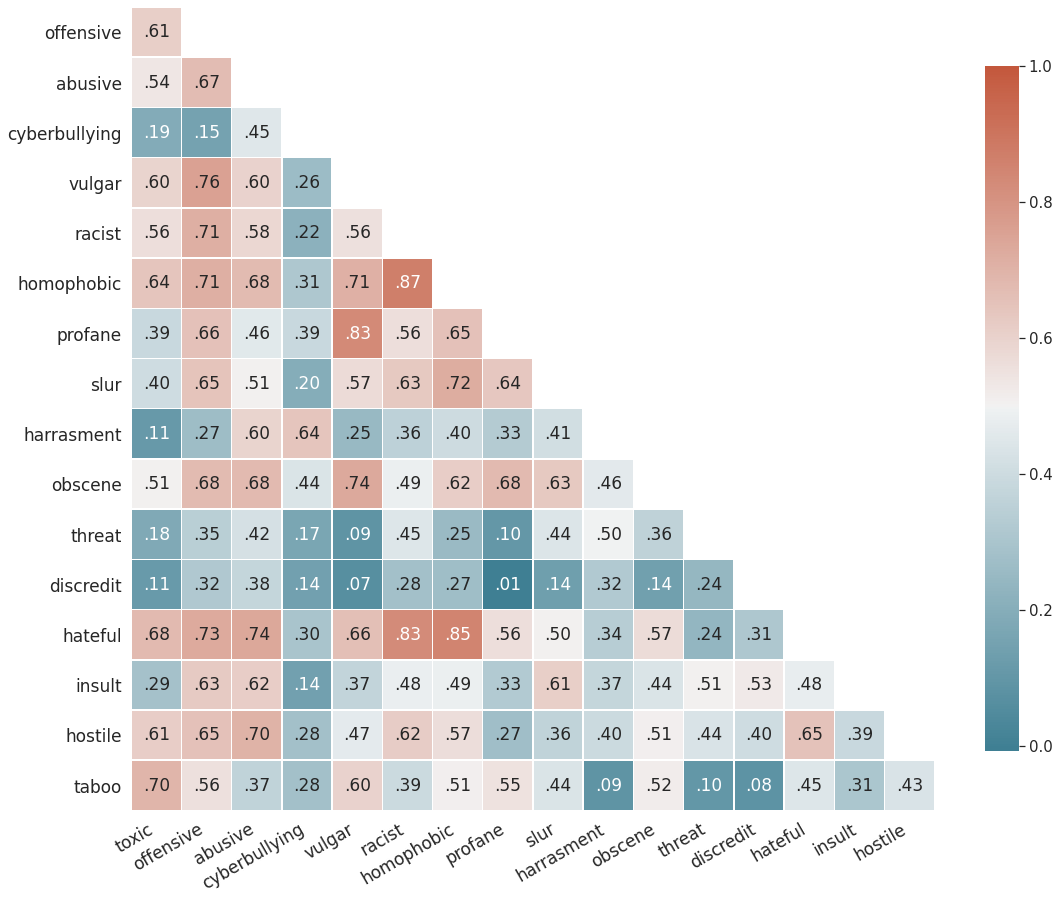

In [6]:
# Word2Vec
model_gn = Word2Vec.load("outputs/w2v_50dim_model_v2")
plot_heatmap(listOfWordsCombinations, model_gn)

<AxesSubplot:>

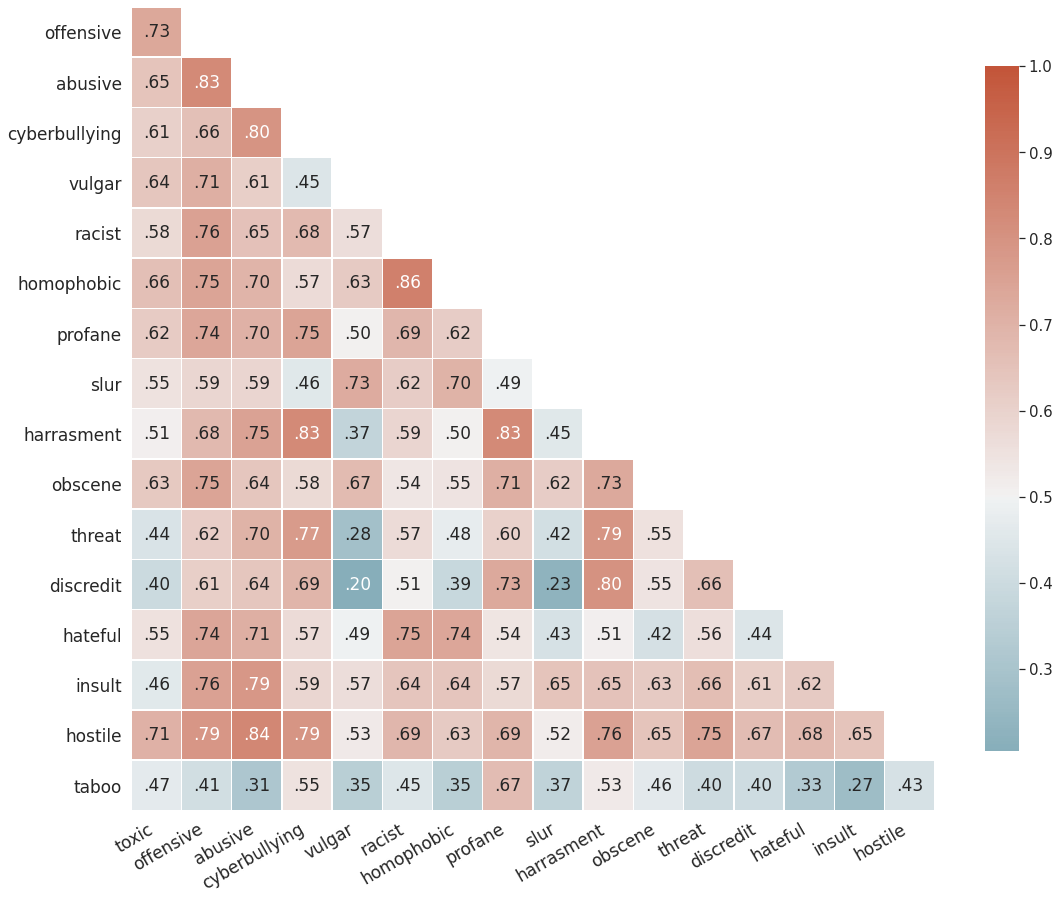

In [7]:
# fastText
model_gn = FastText.load("outputs/fastText_50dim_model_v2")
plot_heatmap(listOfWordsCombinations, model_gn)